# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Extract Big Mountain Data](#4.5_Extract_Big_Mountain_Data)
  * [4.6 Train/Test Split](#4.6_Train/Test_Split)
  * [4.7 Initial Not-Even-A-Model](#4.7_Initial_Not-Even-A-Model)
    * [4.7.1 Metrics](#4.7.1_Metrics)
      * [4.7.1.1 R-squared, or coefficient of determination](#4.7.1.1_R-squared,_or_coefficient_of_determination)
      * [4.7.1.2 Mean Absolute Error](#4.7.1.2_Mean_Absolute_Error)
      * [4.7.1.3 Mean Squared Error](#4.7.1.3_Mean_Squared_Error)
    * [4.7.2 sklearn metrics](#4.7.2_sklearn_metrics)
        * [4.7.2.0.1 R-squared](#4.7.2.0.1_R-squared)
        * [4.7.2.0.2 Mean absolute error](#4.7.2.0.2_Mean_absolute_error)
        * [4.7.2.0.3 Mean squared error](#4.7.2.0.3_Mean_squared_error)
    * [4.7.3 Note On Calculating Metrics](#4.7.3_Note_On_Calculating_Metrics)
  * [4.8 Initial Models](#4.8_Initial_Models)
    * [4.8.1 Imputing missing feature (predictor) values](#4.8.1_Imputing_missing_feature_(predictor)_values)
      * [4.8.1.1 Impute missing values with median](#4.8.1.1_Impute_missing_values_with_median)
        * [4.8.1.1.1 Learn the values to impute from the train set](#4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.1.2 Apply the imputation to both train and test splits](#4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.1.3 Scale the data](#4.8.1.1.3_Scale_the_data)
        * [4.8.1.1.4 Train the model on the train split](#4.8.1.1.4_Train_the_model_on_the_train_split)
        * [4.8.1.1.5 Make predictions using the model on both train and test splits](#4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.1.6 Assess model performance](#4.8.1.1.6_Assess_model_performance)
      * [4.8.1.2 Impute missing values with the mean](#4.8.1.2_Impute_missing_values_with_the_mean)
        * [4.8.1.2.1 Learn the values to impute from the train set](#4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.2.2 Apply the imputation to both train and test splits](#4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.2.3 Scale the data](#4.8.1.2.3_Scale_the_data)
        * [4.8.1.2.4 Train the model on the train split](#4.8.1.2.4_Train_the_model_on_the_train_split)
        * [4.8.1.2.5 Make predictions using the model on both train and test splits](#4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.2.6 Assess model performance](#4.8.1.2.6_Assess_model_performance)
    * [4.8.2 Pipelines](#4.8.2_Pipelines)
      * [4.8.2.1 Define the pipeline](#4.8.2.1_Define_the_pipeline)
      * [4.8.2.2 Fit the pipeline](#4.8.2.2_Fit_the_pipeline)
      * [4.8.2.3 Make predictions on the train and test sets](#4.8.2.3_Make_predictions_on_the_train_and_test_sets)
      * [4.8.2.4 Assess performance](#4.8.2.4_Assess_performance)
  * [4.9 Refining The Linear Model](#4.9_Refining_The_Linear_Model)
    * [4.9.1 Define the pipeline](#4.9.1_Define_the_pipeline)
    * [4.9.2 Fit the pipeline](#4.9.2_Fit_the_pipeline)
    * [4.9.3 Assess performance on the train and test set](#4.9.3_Assess_performance_on_the_train_and_test_set)
    * [4.9.4 Define a new pipeline to select a different number of features](#4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features)
    * [4.9.5 Fit the pipeline](#4.9.5_Fit_the_pipeline)
    * [4.9.6 Assess performance on train and test data](#4.9.6_Assess_performance_on_train_and_test_data)
    * [4.9.7 Assessing performance using cross-validation](#4.9.7_Assessing_performance_using_cross-validation)
    * [4.9.8 Hyperparameter search using GridSearchCV](#4.9.8_Hyperparameter_search_using_GridSearchCV)
  * [4.10 Random Forest Model](#4.10_Random_Forest_Model)
    * [4.10.1 Define the pipeline](#4.10.1_Define_the_pipeline)
    * [4.10.2 Fit and assess performance using cross-validation](#4.10.2_Fit_and_assess_performance_using_cross-validation)
    * [4.10.3 Hyperparameter search using GridSearchCV](#4.10.3_Hyperparameter_search_using_GridSearchCV)
  * [4.11 Final Model Selection](#4.11_Final_Model_Selection)
    * [4.11.1 Linear regression model performance](#4.11.1_Linear_regression_model_performance)
    * [4.11.2 Random forest regression model performance](#4.11.2_Random_forest_regression_model_performance)
    * [4.11.3 Conclusion](#4.11.3_Conclusion)
  * [4.12 Data quantity assessment](#4.12_Data_quantity_assessment)
  * [4.13 Save best model object from pipeline](#4.13_Save_best_model_object_from_pipeline)
  * [4.14 Summary](#4.14_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

In preceding notebooks, performed preliminary assessments of data quality and refined the question to be answered. We found a small number of data values that gave clear choices about whether to replace values or drop a whole row. We determined that predicting the adult weekend ticket price was our primary aim. We threw away records with missing price data, but not before making the most of the other available data to look for any patterns between the states. We didn't see any and decided to treat all states equally; the state label didn't seem to be particularly useful.

In this notebook we will start to build machine learning models. Our first model is a baseline performance comparitor for any subsequent model. We then build up the process of efficiently and robustly creating and assessing models against it. 

## 4.3 Imports<a id='4.3_Imports'></a>

In [118]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [119]:
ski_data = pd.read_csv('ski_data_step3_features.csv')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


## 4.5 Extract Big Mountain Data<a id='4.5_Extract_Big_Mountain_Data'></a>

Big Mountain is our resort. Separate it from the rest of the data to use later.

In [120]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [121]:
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [122]:
ski_data.shape

(277, 36)

In [123]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [124]:
ski_data.shape

(276, 36)

## 4.6 Train/Test Split<a id='4.6_Train/Test_Split'></a>

By partitioning the data into training and testing splits, without letting a model (or missing-value imputation) learn anything about the test split, we have a somewhat independent assessment of how our model might perform in the future. 

In model selection process, we will try to get better and better performance on that one data set, but that's where cross-validation becomes especially useful. While training models, a test split is very useful as a final check on expected future performance.

What partition sizes would we have with a 70/30 train/test split?

In [125]:
len(ski_data) * .7, len(ski_data) * .3

(193.2, 82.8)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [127]:
X_train.shape, X_test.shape

((193, 35), (83, 35))

In [128]:
y_train.shape, y_test.shape

((193,), (83,))

In [129]:
#Code task 1#
#Save the 'Name', 'state', and 'Region' columns from the train/test data into names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace= True)
X_test.drop(columns=names_list, inplace= True)
X_train.shape, X_test.shape

((193, 32), (83, 32))

In [130]:
#Code task 2#
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

In [131]:
#Code task 3#
#Repeat this check for the test split in `X_test`
X_test.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

We have only numeric features in your X now!

## 4.7 Initial Not-Even-A-Model<a id='4.7_Initial_Not-Even-A-Model'></a>

A good place to start is to see how good the mean is as a predictor. In other words, what if we simply say our best guess is the average price?

In [132]:
#Code task 4#
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

63.811088082901556

`sklearn`'s `DummyRegressor` easily does this:

In [133]:
#Code task 5#
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[63.81108808]])

How good is this? How closely does this match, or explain, the actual values? There are many ways of assessing how good one set of values agrees with another, which brings us to the subject of metrics.

### 4.7.1 Metrics<a id='4.7.1_Metrics'></a>

#### 4.7.1.1 R-squared, or coefficient of determination<a id='4.7.1.1_R-squared,_or_coefficient_of_determination'></a>

In [134]:
#Code task 6#
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_tot / sum_sq_res
    return R2

Make our predictions by creating an array of length the size of the training set with the single value of the mean.

In [135]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

Remember the `sklearn` dummy regressor? 

In [136]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

We can see that `DummyRegressor` produces exactly the same results.

In [137]:
r_squared(y_train, y_tr_pred)

0.0

Exactly as expected, if we use the average value as our prediction, we get an $R^2$ of zero _on our training set_. What if we use this "model" to predict unseen values from the test set? Remember, of course, that our "model" is trained on the training set; we still use the training set mean as your prediction.

Make our predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [138]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

0.0031137940436898326

Generally, you can expect performance on a test set to be slightly worse than on the training set. As you are getting an $R^2$ of zero on the training set, there's nowhere to go but negative!

$R^2$ is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if we want an idea of how "close" our predictions are to the true values. Metrics that summarise the difference between predicted and actual values are _mean absolute error_ and _mean squared error_.

#### 4.7.1.2 Mean Absolute Error<a id='4.7.1.2_Mean_Absolute_Error'></a>

In [139]:
#Code task 7#
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs( y - ypred)
    mae = np.mean(abs_error)
    return mae

In [140]:
mae(y_train, y_tr_pred)

17.923463717146785

In [141]:
mae(y_test, y_te_pred)

19.136142081278486

Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells we that, on average, we might expect to be off by around \\$19 if you guessed ticket price based on an average of known values.

#### 4.7.1.3 Mean Squared Error<a id='4.7.1.3_Mean_Squared_Error'></a>

In [142]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [143]:
mse(y_train, y_tr_pred)

614.1334096969057

In [144]:
mse(y_test, y_te_pred)

581.4365441953481

So here, we get a slightly better MSE on the test set than we did on the train set. And what does a squared error mean anyway? To convert this back to our measurement space, we often take the square root, to form the _root mean square error_ thus:

In [145]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

### 4.7.2 sklearn metrics<a id='4.7.2_sklearn_metrics'></a>

Functions are good, but We don't want to have to define functions every time we want to assess performance. `sklearn.metrics` provides many commonly used metrics, included the ones above.

##### 4.7.2.0.1 R-squared<a id='4.7.2.0.1_R-squared'></a>

In [146]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

##### 4.7.2.0.2 Mean absolute error<a id='4.7.2.0.2_Mean_absolute_error'></a>

In [147]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(17.92346371714677, 19.136142081278486)

##### 4.7.2.0.3 Mean squared error<a id='4.7.2.0.3_Mean_squared_error'></a>

In [148]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(614.1334096969046, 581.4365441953483)

### 4.7.3 Note On Calculating Metrics<a id='4.7.3_Note_On_Calculating_Metrics'></a>

In [149]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [150]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.0031235200417913944, 0.0)

In [151]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, 1.0)

In [152]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(0.0031137940436898326, 1.0)

Order of arguments are important and wrong order results into wrong results.

## 4.8 Initial Models<a id='4.8_Initial_Models'></a>

### 4.8.1 Imputing missing feature (predictor) values<a id='4.8.1_Imputing_missing_feature_(predictor)_values'></a>

Recall when performing EDA, we imputed (filled in) some missing values in pandas. we did this judiciously for exploratory/visualization purposes. We left many missing values in the data. We can impute missing values using scikit-learn, but note that we should learn values to impute from a train split and apply that to the test split to then assess how well our imputation worked.

#### 4.8.1.1 Impute missing values with median<a id='4.8.1.1_Impute_missing_values_with_median'></a>

There's missing values. Recall from our data exploration that many distributions were skewed. Our first thought might be to impute missing values using the median.

##### 4.8.1.1.1 Learn the values to impute from the train set<a id='4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [153]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000
projectedDaysOpen                      115.000000


##### 4.8.1.1.2 Apply the imputation to both train and test splits<a id='4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [154]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

##### 4.8.1.1.3 Scale the data<a id='4.8.1.1.3_Scale_the_data'></a>

As we have features measured in many different units, with numbers that vary by orders of magnitude, start off by scaling them to put them all on a consistent scale. The StandardScaler scales each feature to zero mean and unit variance.

In [155]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

##### 4.8.1.1.4 Train the model on the train split<a id='4.8.1.1.4_Train_the_model_on_the_train_split'></a>

In [156]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

##### 4.8.1.1.5 Make predictions using the model on both train and test splits<a id='4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [157]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

##### 4.8.1.1.6 Assess model performance<a id='4.8.1.1.6_Assess_model_performance'></a>

In [158]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8182411754634673, 0.7133138724459633)

Our simple linear regression model explains over 80% of the variance on the train set and over 70% on the test set. The much lower value for the test set suggests we're overfitting somewhat. This isn't a surprise as we've made no effort to select a parsimonious set of features or deal with multicollinearity in our data.

In [159]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.52488055610257, 9.531438705596335)

Using this model, then, on average we'd expect to estimate a ticket price within \\$9 or so of the real price. This is much, much better than the \\$19 from just guessing using the average. 

In [160]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(111.62416665512222, 166.17075359455373)

In [161]:
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(10.565233866560751, 12.890723548139325)

#### 4.8.1.2 Impute missing values with the mean<a id='4.8.1.2_Impute_missing_values_with_the_mean'></a>

We chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if we wanted to try something else, such as the mean?

##### 4.8.1.2.1 Learn the values to impute from the train set<a id='4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set'></a>

In [162]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160
projectedDaysOpen                      115.920245


By eye, we can immediately tell that our replacement values are much higher than those from using the median.

##### 4.8.1.2.2 Apply the imputation to both train and test splits<a id='4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits'></a>

In [163]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

##### 4.8.1.2.3 Scale the data<a id='4.8.1.2.3_Scale_the_data'></a>

In [164]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

##### 4.8.1.2.4 Train the model on the train split<a id='4.8.1.2.4_Train_the_model_on_the_train_split'></a>

In [165]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

##### 4.8.1.2.5 Make predictions using the model on both train and test splits<a id='4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits'></a>

In [166]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

##### 4.8.1.2.6 Assess model performance<a id='4.8.1.2.6_Assess_model_performance'></a>

In [167]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8173783496786806, 0.7115886369023825)

In [168]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.524561265474562, 9.491646718308688)

In [169]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.15405679630773, 167.17074509344792)

In [170]:
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(10.590281242550065, 12.92945262157095)

These results don't seem very different to when we used the median for imputing missing values. Perhaps it doesn't make much difference here. Maybe our overtraining dominates. 

Maybe other feature transformations, such as taking the log, would help. We could try with just a subset of features rather than using all of them as inputs.

We can performe the steps by 'sklearn': 
1. impute missing values
2. scale the features
3. train a model
4. calculate model performance

### 4.8.2 Pipelines<a id='4.8.2_Pipelines'></a>

#### 4.8.2.1 Define the pipeline<a id='4.8.2.1_Define_the_pipeline'></a>

In [171]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [172]:
type(pipe)

sklearn.pipeline.Pipeline

In [173]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

#### 4.8.2.2 Fit the pipeline<a id='4.8.2.2_Fit_the_pipeline'></a>

let's fit the pipe on the train set.

In [174]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 4.8.2.3 Make predictions on the train and test sets<a id='4.8.2.3_Make_predictions_on_the_train_and_test_sets'></a>

In [175]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

#### 4.8.2.4 Assess performance<a id='4.8.2.4_Assess_performance'></a>

In [176]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8182411754634673, 0.7133138724459633)

And compare with our earlier (non-pipeline) result:

In [177]:
median_r2

(0.8182411754634673, 0.7133138724459633)

In [178]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.52488055610257, 9.531438705596335)

Compare with our earlier result:

In [179]:
median_mae

(8.52488055610257, 9.531438705596335)

In [180]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(111.62416665512222, 166.17075359455373)

Compare with our earlier result:

In [181]:
median_mse

(111.62416665512222, 166.17075359455373)

These results confirm the pipeline is doing exactly what's expected, and results are identical to our earlier steps. This allows us to move faster but with confidence.

## 4.9 Refining The Linear Model<a id='4.9_Refining_The_Linear_Model'></a>

We suspected the model was overfitting. This is no real surprise given the number of features we blindly used. It's likely a judicious subset of features would generalize better. `sklearn` has a number of feature selection functions available. let's use `SelectKBest' function to select the k best features. 

### 4.9.1 Define the pipeline<a id='4.9.1_Define_the_pipeline'></a>

Redefine our pipeline to include this feature selection step:

In [182]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

### 4.9.2 Fit the pipeline<a id='4.9.2_Fit_the_pipeline'></a>

In [183]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000002A7B648C1F0>)),
                ('linearregression', LinearRegression())])

### 4.9.3 Assess performance on the train and test set<a id='4.9.3_Assess_performance_on_the_train_and_test_set'></a>

In [184]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [185]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, 0.6259877354190834)

In [186]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 11.201830190332055)

This has made things worse! Clearly selecting a subset of features has an impact on performance. `SelectKBest` defaults to k=10. We've just seen that 10 is worse than using all features. What is the best k? We could create a new pipeline with a different value of k:

### 4.9.4 Define a new pipeline to select a different number of features<a id='4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features'></a>

In [187]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

### 4.9.5 Fit the pipeline<a id='4.9.5_Fit_the_pipeline'></a>

In [188]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x000002A7B648C1F0>)),
                ('linearregression', LinearRegression())])

### 4.9.6 Assess performance on train and test data<a id='4.9.6_Assess_performance_on_train_and_test_data'></a>

In [189]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [190]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, 0.6376199973170797)

In [191]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.211767769307116, 10.488246867294356)

We could keep going, trying different values of k, training a model, measuring performance on the test set, and then picking the model with the best test set performance. There's a fundamental problem with this approach: we're tuning the model to the arbitrary test set! If we continue this way we'll end up with a model works well on the particular quirks of our test set _but fails to generalize to new data. The whole point of keeping a test set is for it to be a set of that new data, to check how well our model might perform on data it hasn't seen.

The way around this is a technique called _cross-validation_. You partition the training set into k folds, train our model on k-1 of those folds, and calculate performance on the fold not used in training. This procedure then cycles through k times with a different fold held back each time. Thus we end up building k models on k sets of data with k estimates of how the model performs on unseen data but without having to touch the test set.

### 4.9.7 Assessing performance using cross-validation<a id='4.9.7_Assessing_performance_using_cross-validation'></a>

In [192]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [193]:
cv_results

{'fit_time': array([0.05681658, 0.07030368, 0.04085803, 0.05297494, 0.09901547]),
 'score_time': array([0.02741551, 0.01716471, 0.00698972, 0.02803922, 0.05278826]),
 'test_score': array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])}

In [194]:
cv_scores = cv_results['test_score']
cv_scores

array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])

Without using the same random state for initializing the CV folds, our actual numbers will be different.

In [195]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007864, 0.09502487849877701)

These results highlight that assessing model performance in inherently open to variability. We'll get different results depending on the quirks of which points are in which fold. An advantage of this is that we can also obtain an estimate of the variability, or uncertainty, in our performance estimate.

In [196]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.44, 0.82])

### 4.9.8 Hyperparameter search using GridSearchCV<a id='4.9.8_Hyperparameter_search_using_GridSearchCV'></a>

Pulling the above together, we have:
* a pipeline that
    * imputes missing values
    * scales the data
    * selects the k best features
    * trains a linear regression model
* a technique (cross-validation) for estimating model performance

Now we want to use cross-validation for multiple values of k and use cross-validation to pick the value of k that gives the best performance. 

Let's get a list of names of all the parameters in a pipeline like this:

In [197]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

The above can be particularly useful as your pipelines becomes more complex (you can even nest pipelines within pipelines).

In [198]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

`GridSearchCV` takes the pipeline object, in fact it takes anything with a `.fit()` and `.predict()` method. In simple cases with no feature selection or imputation or feature scaling etc. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [199]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [200]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002A7B648C1F0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [201]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [202]:
#Code task 19#
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 8}

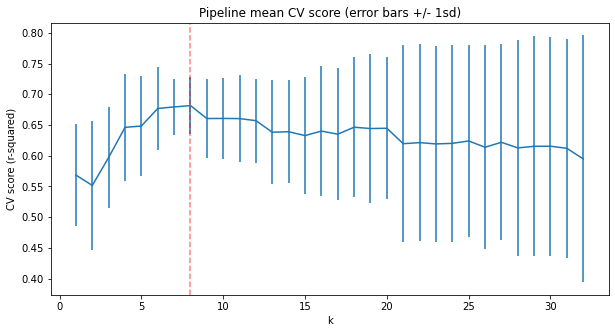

In [203]:
#Code task 20#
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The above suggests a good value for k is 8. There was an initial rapid increase with k, followed by a slow decline. Also noticeable is the variance of the results greatly increase above k=8. As you increasingly overfit, expect greater swings in performance as different points move in and out of the train/test folds.

Which features were most useful? Step into our best model, shown below. Starting with the fitted grid search object, we get the best estimator, then the named step 'selectkbest', for which we can its `get_support()` method for a logical mask of the features selected.

In [204]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

Similarly, instead of using the 'selectkbest' named step, we can access the named step for the linear regression model and, from that, grab the model coefficients via its `coef_` attribute:

In [205]:
X_train.columns[selected]

Index(['vertical_drop', 'trams', 'fastQuads', 'total_chairs', 'Runs',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac'],
      dtype='object')

In [206]:
lr_grid_cv.best_estimator_.named_steps.linearregression.coef_

array([10.76785683, -4.14202436,  5.74562617,  5.79415581,  5.37055529,
        0.18181396, -5.24977989,  6.29007443])

In [207]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending= False)

vertical_drop        10.767857
Snow Making_ac        6.290074
total_chairs          5.794156
fastQuads             5.745626
Runs                  5.370555
LongestRun_mi         0.181814
trams                -4.142024
SkiableTerrain_ac    -5.249780
dtype: float64

These results suggest that vertical drop is our biggest positive feature. This makes intuitive sense and is consistent with what we saw during the EDA work. Also, we see the area covered by snow making equipment is a strong positive as well. People like guaranteed skiing! The skiable terrain area is negatively associated with ticket price!It could be an effect whereby larger resorts can host more visitors at any one time and so can charge less per ticket. As has been mentioned previously, the data are missing information about visitor numbers. Bear in mind,  the coefficient for skiable terrain is negative _for this model_. For example, if we kept the total number of chairs and fastQuads constant, but increased the skiable terrain extent, we might imagine the resort is worse off because the chairlift capacity is stretched thinner.

## 4.10 Random Forest Model<a id='4.10_Random_Forest_Model'></a>

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by `sklearn`'s `RandomForestRegressor` class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. `cross_validate` will perform the fitting as part of the process. This uses the default settings for the random forest so we'll then proceed to investigate some different hyperparameters.

### 4.10.1 Define the pipeline<a id='4.10.1_Define_the_pipeline'></a>

In [208]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy= 'median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

### 4.10.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [209]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [210]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.67961307, 0.78312777, 0.76469692, 0.62246559, 0.65387482])

In [211]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7007556343698059, 0.06268621386635806)

### 4.10.3 Hyperparameter search using GridSearchCV<a id='4.10.3_Hyperparameter_search_using_GridSearchCV'></a>

We will try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.

In [212]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [213]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid= grid_params, cv= 5, n_jobs=-1)

In [214]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [215]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 69,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

It looks like imputing with the median helps, but scaling the features doesn't.

In [216]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.67856998, 0.78992266, 0.75125932, 0.62929941, 0.68937568])

In [217]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.70768540845949, 0.056549042392094705)

We have marginally improved upon the default CV results. 

In [218]:
rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_


array([0.00887637, 0.08930207, 0.00794745, 0.00068676, 0.008305  ,
       0.25437349, 0.01496098, 0.00424111, 0.00571101, 0.00524355,
       0.0186907 , 0.25494135, 0.00256054, 0.01165062, 0.02624455,
       0.11144371, 0.01258059, 0.01170261, 0.00498245, 0.01793166,
       0.01256071, 0.00710128, 0.0136965 , 0.0046357 , 0.01351258,
       0.01615363, 0.00721201, 0.0080666 , 0.01450842, 0.01078764,
       0.01095798, 0.00843038])

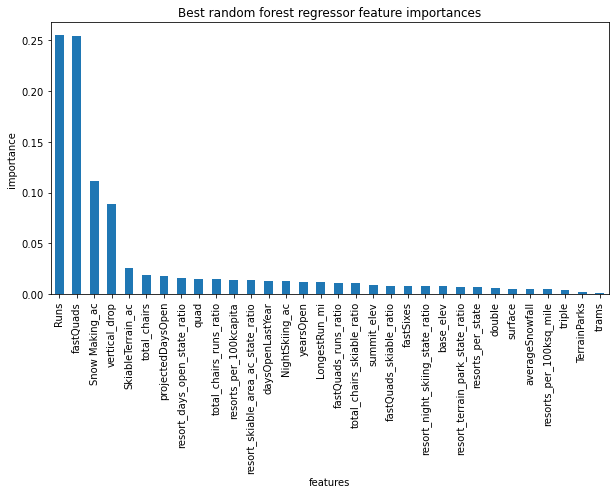

In [219]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top four features are in common with our linear model:
* fastQuads
* Runs
* Snow Making_ac
* vertical_drop

## 4.11 Final Model Selection<a id='4.11_Final_Model_Selection'></a>

Time to select our final model to use for further business modeling! It would be good to revisit the above model selection; 
It would also be worthwhile to investigate removing the least useful features. 

Certainly there seem to be four strong features here and so a model using only those would probably work well.

### 4.11.1 Linear regression model performance<a id='4.11.1_Linear_regression_model_performance'></a>

In [220]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [221]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(10.499032338015294, 1.6220608976799664)

In [222]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

11.793465668669324

### 4.11.2 Random forest regression model performance<a id='4.11.2_Random_forest_regression_model_performance'></a>

In [223]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [224]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.797593303213441, 1.4709795480917263)

In [225]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.42152959664746

### 4.11.3 Conclusion<a id='4.11.3_Conclusion'></a>

The random forest model has a lower cross-validation mean absolute error by almost \\$1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.

## 4.12 Data quantity assessment<a id='4.12_Data_quantity_assessment'></a>

Finally, we need to advise the business whether it needs to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The `learning_curve` function does this conveniently.

In [226]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

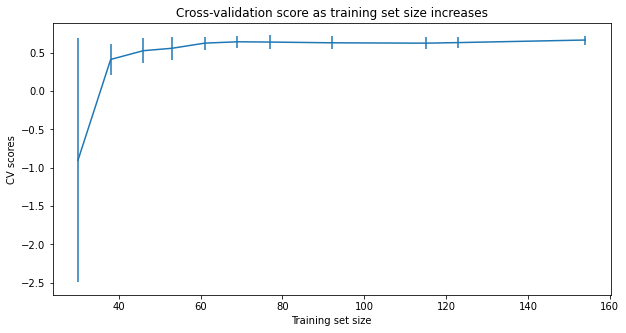

In [227]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

This shows that we seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.

## 4.13 Save best model object from pipeline<a id='4.13_Save_best_model_object_from_pipeline'></a>

In [228]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = 1
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [234]:
#save_file(best_model, 'ski_resort_pricing_model.pkl')
pickle.dump(best_model,'C:/Users/bahra/Documents/Python_Practice/JupNote/Data-Science-Projects/Data-Science-Projects')


TypeError: file must have a 'write' attribute

In [236]:
with open('C:/Users/bahra/Documents/Python_Practice/JupNote/Data-Science-Projects/Data-Science-Projects/ski_resort_pricing_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## 4.14 Summary<a id='4.14_Summary'></a>

First of all the row related to our resort “Big Mountain” was dropped from ski_data, so ski_data had 276 resorts with 36 features. As the first step in the model selection process, data was partitioned into training and testing split, while X contained all features except ‘AdultWeekend’ and y was ‘AdultWeekend’ column as the target feature. Three categorical features including 'Name', 'state', 'Region' was dropped from X_train and X_test. 

When the average value of y.train used as the prediction, we got an R-squared of Zero on training and test set because 𝑅2 tells us how much of the variance features were explaining beyond that of using just the mean, and we were using just the mean. 
We needed to compute mean absolute error (MAE) and mean squared error(MSE) to understand how the predicted values are close to the true values. 

•	MAE on train set was 17.92 dollars, and on test set was $19.14.

•	Square root of MSE on train set was 24.78 dollars, and on test set was $24.12

Recall when performing EDA, we imputed (filled in) some missing values in pandas for exploratory/visualization purposes. We left many missing values in the data, since many predictor features were skewed, we imputed them with median. To impute missing values using scikit-learn, we learned values to impute from a train split and apply that to the test split to then assess how well our imputation worked. As the features measured in many different units, with numbers that vary by orders of magnitude, we called the StandardScaler and fit the scaler on X_train (imputed before) and then transformed or scaled each feature to zero mean and unit variance. Ultimately, our train and test data had standard distribution and any missing values, so they were ready to train the linear regression model on the train set.

After training model on the train split, prediction using the model on both train and test splits has been made. R2 on train set was 81% and on test set 71%, that means our simple linear regression model explained 81% of variance on the train set and 71% of variance on the test set.The much lower value of R2 on test showed somewhat overfitting which was expected because we didn’t select a bunch of features or checking for multicollinearity. 


Imputing with median, Standard Scaling, Fitting Linear regression model

    Performance Metric in Predicting on Train set	
R2	      81%	 

MAE	      $8.53	

MSE	      111.62 

Sqrt(MSE) $10.56



	Performance Metric in Predicting on Test set
R2	      71%

MAE	      $9.53

MSE	      166.17

Sqrt(MSE) $10.89

Not too much difference.


Making a pipeline included SelectKBest function helped select different number of features but the problem of this approach was fitting the best model on an arbitrary test set which finally would fail to be generalized. 
In contrast, cross validation method partitioning the train set into k fold had the advantage of building k models on k sets of data with k estimates about the performance of models(score) without touching the test set. Also, mean and standard deviation of scores gave an estimate of the variability, or uncertainty of the performance.
Creating an object from GridSearchCV class in Sklearn helped iterate over multiple values of k (in the length of number of features) to perform cross validation with 5 folds to then investigate which features were best for the linear regression model besides their coeffiecients:

vertical_drop        10.767857

Snow Making_ac        6.290074

total_chairs          5.794156

fastQuads             5.745626

Runs                  5.370555

LongestRun_mi         0.181814

trams                -4.142024

SkiableTerrain_ac    -5.249780





    AdultWeekend = Intercept+ 10.767857* vertical_drop  +  6.290074* Snow Making_ac + 5.794156* total_chairs + 5.745626* fastQuads + 5.370555* Runs + 0.181814* LongestRun_mi + (-4.142024)*trams +(-5.249780)* SkiableTerrain_ac



The results suggest that vertical drop is our biggest positive feature. This makes intuitive sense and is consistent with what we saw during the EDA work. Also, we see the area covered by snow making equipment is a strong positive as well. People like guaranteed skiing! The skiable terrain area is negatively associated with ticket price! It could be an effect whereby larger resorts can host more visitors at any one time and so can charge less per ticket. As has been mentioned previously, the data are missing information about visitor numbers. Bear in mind, the coefficient for skiable terrain is negative for this model. For example, if you kept the total number of chairs and fastQuads constant, but increased the skiable terrain extent, you might imagine the resort is worse off because the chairlift capacity is stretched thinner.
After making pipeline, fitting on training set and selecting best features along with their coefficients for a linear regression model by cross validating in training set, we took steps fit RandomForest on training data. RandomForest let us to go straight from making pipeline to assess performance using cross validation. In fact, cross validation performs the fitting as part of the process. Calling the GridSearchCV with and without feature scaling, and try both the mean and median as strategies for imputing missing values for defined random forest pipeline demonstrated that imputing with the median helped, but scaling the features didn’t. Encouragingly, the dominant top four features are in common with our linear model:

•	fastQuads

•	Runs

•	Snow Making_ac

•	vertical_drop

Finally, assessing performance of Linear regression and Random Forest Regression models on test set using negative of the mean absolute error for scoring revealed that the random forest model has a lower cross-validation mean absolute error by almost $1. It also exhibits less variability. Verifying performance on the test set produces performance consistent with the cross-validation results.


CV on Train set	Linear regression Model	Random Forest Regression model

Mean of MAE	$10.50:	$9.79

Std of MAE	$1.62:	$1.47


Prediction on Test set	Linear regression Model	Random Forest Regression model

MAE	$11.79:	$9.42

learning_curve function showed that we seem to have plenty of data. There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 40-50.
 